In [1]:
#make necessary imports
#import warnings
#warning.filterwarnings("ignore")
from scipy.io import arff
import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv(r"E:\3.2\software project\chronic_kidney_disease.csv")
print(df.head(5))
 

  age  bp     sg al su  rbc  pc  pcc  ba  bgr  ... pcv  wbcc rbcc htn dm  cad  \
0  48  80   1.02  1  0    0   0    1   1  121  ...  44  7800  5.2   0  0    1   
1   7  50   1.02  4  0    0   0    1   1    ?  ...  38  6000  0.0   1  1    1   
2  62  80   1.01  2  3    0   0    1   1  423  ...  31  7500  0.0   1  0    1   
3  48  70  1.005  4  0    0   1    0   1  117  ...  32  6700  3.9   0  1    1   
4  51  80   1.01  2  0    0   0    1   1  106  ...  35  7300  4.6   1  1    1   

   appet  pe  ane  class  
0      1   1    1    ckd  
1      1   1    1    ckd  
2      0   1    0    ckd  
3      0   0    0    ckd  
4      1   1    1    ckd  

[5 rows x 25 columns]


In [3]:
df.shape

(400, 25)

In [4]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df.columns.values

array(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'class'], dtype=object)

In [6]:
df['sg'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
#print(df.head(10))

li=list(df.columns.values)
si=len(li)
#print(si)
#df[df.eq('?').any(axis=1)]

#mask = np.column_stack([df[col].str.contains(r"?", na=False) for col in df])
#df.loc[mask.any(axis=1)]

#for x in range(0,si):
    #df.loc[df[li[x]]=='?']
#df[li[0]]
#df.describe()

#df.loc[['age','bp']]="?"

#df.loc[ (df[li[1]]== "?") | (df[li[2]]=="?") |(df[li[3]]=="?")|(df[li[4]]=="?")|(df[li[9]]=="?")|
       #(df[li[10]]=="?")|(df[li[11]]=="?") ]

df = df.replace('?', np.nan)

In [8]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
print(df_imputed)

    age  bp     sg al su rbc pc pcc ba  bgr  ... pcv  wbcc rbcc htn dm cad  \
0    48  80   1.02  1  0   0  0   1  1  121  ...  44  7800  5.2   0  0   1   
1     7  50   1.02  4  0   0  0   1  1   99  ...  38  6000  0.0   1  1   1   
2    62  80   1.01  2  3   0  0   1  1  423  ...  31  7500  0.0   1  0   1   
3    48  70  1.005  4  0   0  1   0  1  117  ...  32  6700  3.9   0  1   1   
4    51  80   1.01  2  0   0  0   1  1  106  ...  35  7300  4.6   1  1   1   
..   ..  ..    ... .. ..  .. ..  .. ..  ...  ...  ..   ...  ...  .. ..  ..   
395  55  80   1.02  0  0   0  0   1  1  140  ...  47  6700  4.9   1  1   1   
396  42  70  1.025  0  0   0  0   1  1   75  ...  54  7800  6.2   1  1   1   
397  12  80   1.02  0  0   0  0   1  1  100  ...  49  6600  5.4   1  1   1   
398  17  60  1.025  0  0   0  0   1  1  114  ...  51  7200  5.9   1  1   1   
399  58  80  1.025  0  0   0  0   1  1  131  ...  53  6800  6.1   1  1   1   

    appet pe ane   class  
0       1  1   1     ckd  
1       1

In [10]:
df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
for i in df_imputed.columns:
    print("***************************",i,"*************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

*************************** age *************************************

{'42', '52', '69', '61', '50', '60', '46', '39', '83', '6', '33', '37', '27', '64', '78', '2', '28', '54', '47', '8', '40', '12', '32', '55', '30', '20', '29', '44', '25', '73', '76', '35', '4', '59', '22', '58', '17', '72', '56', '90', '51', '80', '70', '15', '68', '49', '19', '34', '7', '63', '74', '71', '65', '38', '3', '5', '36', '62', '23', '24', '41', '53', '43', '66', '21', '82', '81', '26', '11', '57', '14', '75', '79', '48', '45', '67'}

*************************** bp *************************************

{'110', '90', '100', '120', '80', '50', '70', '60', '180', '140'}

*************************** sg *************************************

{'1.015', '1.025', '1.005', '1.01', '1.02'}

*************************** al *************************************

{'0', '1', '2', '3', '5', '4'}

*************************** su *************************************

{'0', '1', '2', '3', '5', '4'}

**********************

AxesSubplot(0.125,0.11;0.775x0.77)


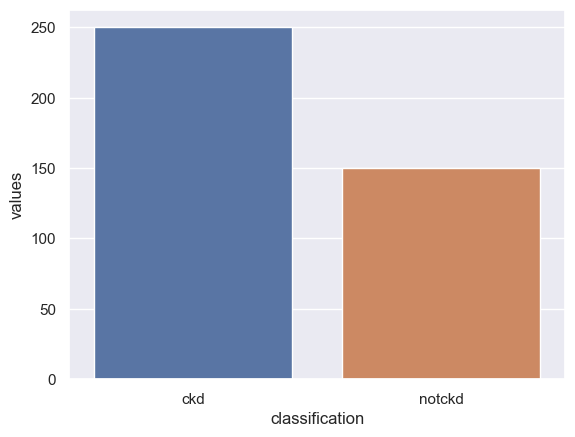

In [12]:
#cleaked lavel imbalance
import matplotlib.pyplot as plt
import seaborn as sus

temp=df_imputed["class"].value_counts()
temp_df=pd.DataFrame({'classification':temp.index,'values' : temp.values})
print(sus.barplot(x='classification',y='values',data=temp_df))



In [13]:
df.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object


In [14]:
df_imputed.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object


In [15]:
df.select_dtypes(exclude=['object']).columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [16]:
#fixing data

#dic={'age' : 'float',
     #'bp' : 'float',
     #'sg' : 'float',
     #'al' : 'float',
     #'su' : 'float',
     #'bgr' : 'float',
     #'bu' : 'float',
     #'sc' : 'float',
     #'sod' : 'float',
     #'pot' : 'float',
     #'hemo' : 'float'}
#df_imputed=df_imputed.astype(dic) 

df_imputed['age'] = df_imputed['age'].astype('float')
df_imputed['bp'] = df_imputed['bp'].astype('float')
df_imputed['sg'] = df_imputed['sg'].astype('float')
df_imputed['al'] = df_imputed['al'].astype('float')
df_imputed['su'] = df_imputed['su'].astype('float')
df_imputed['sc'] = df_imputed['sc'].astype('float')
df_imputed['sod'] = df_imputed['sod'].astype('float')
df_imputed['pot'] = df_imputed['pot'].astype('float')
df_imputed['hemo'] = df_imputed['hemo'].astype('float')



In [17]:
print(df_imputed.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr       object
bu        object
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wbcc      object
rbcc      object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


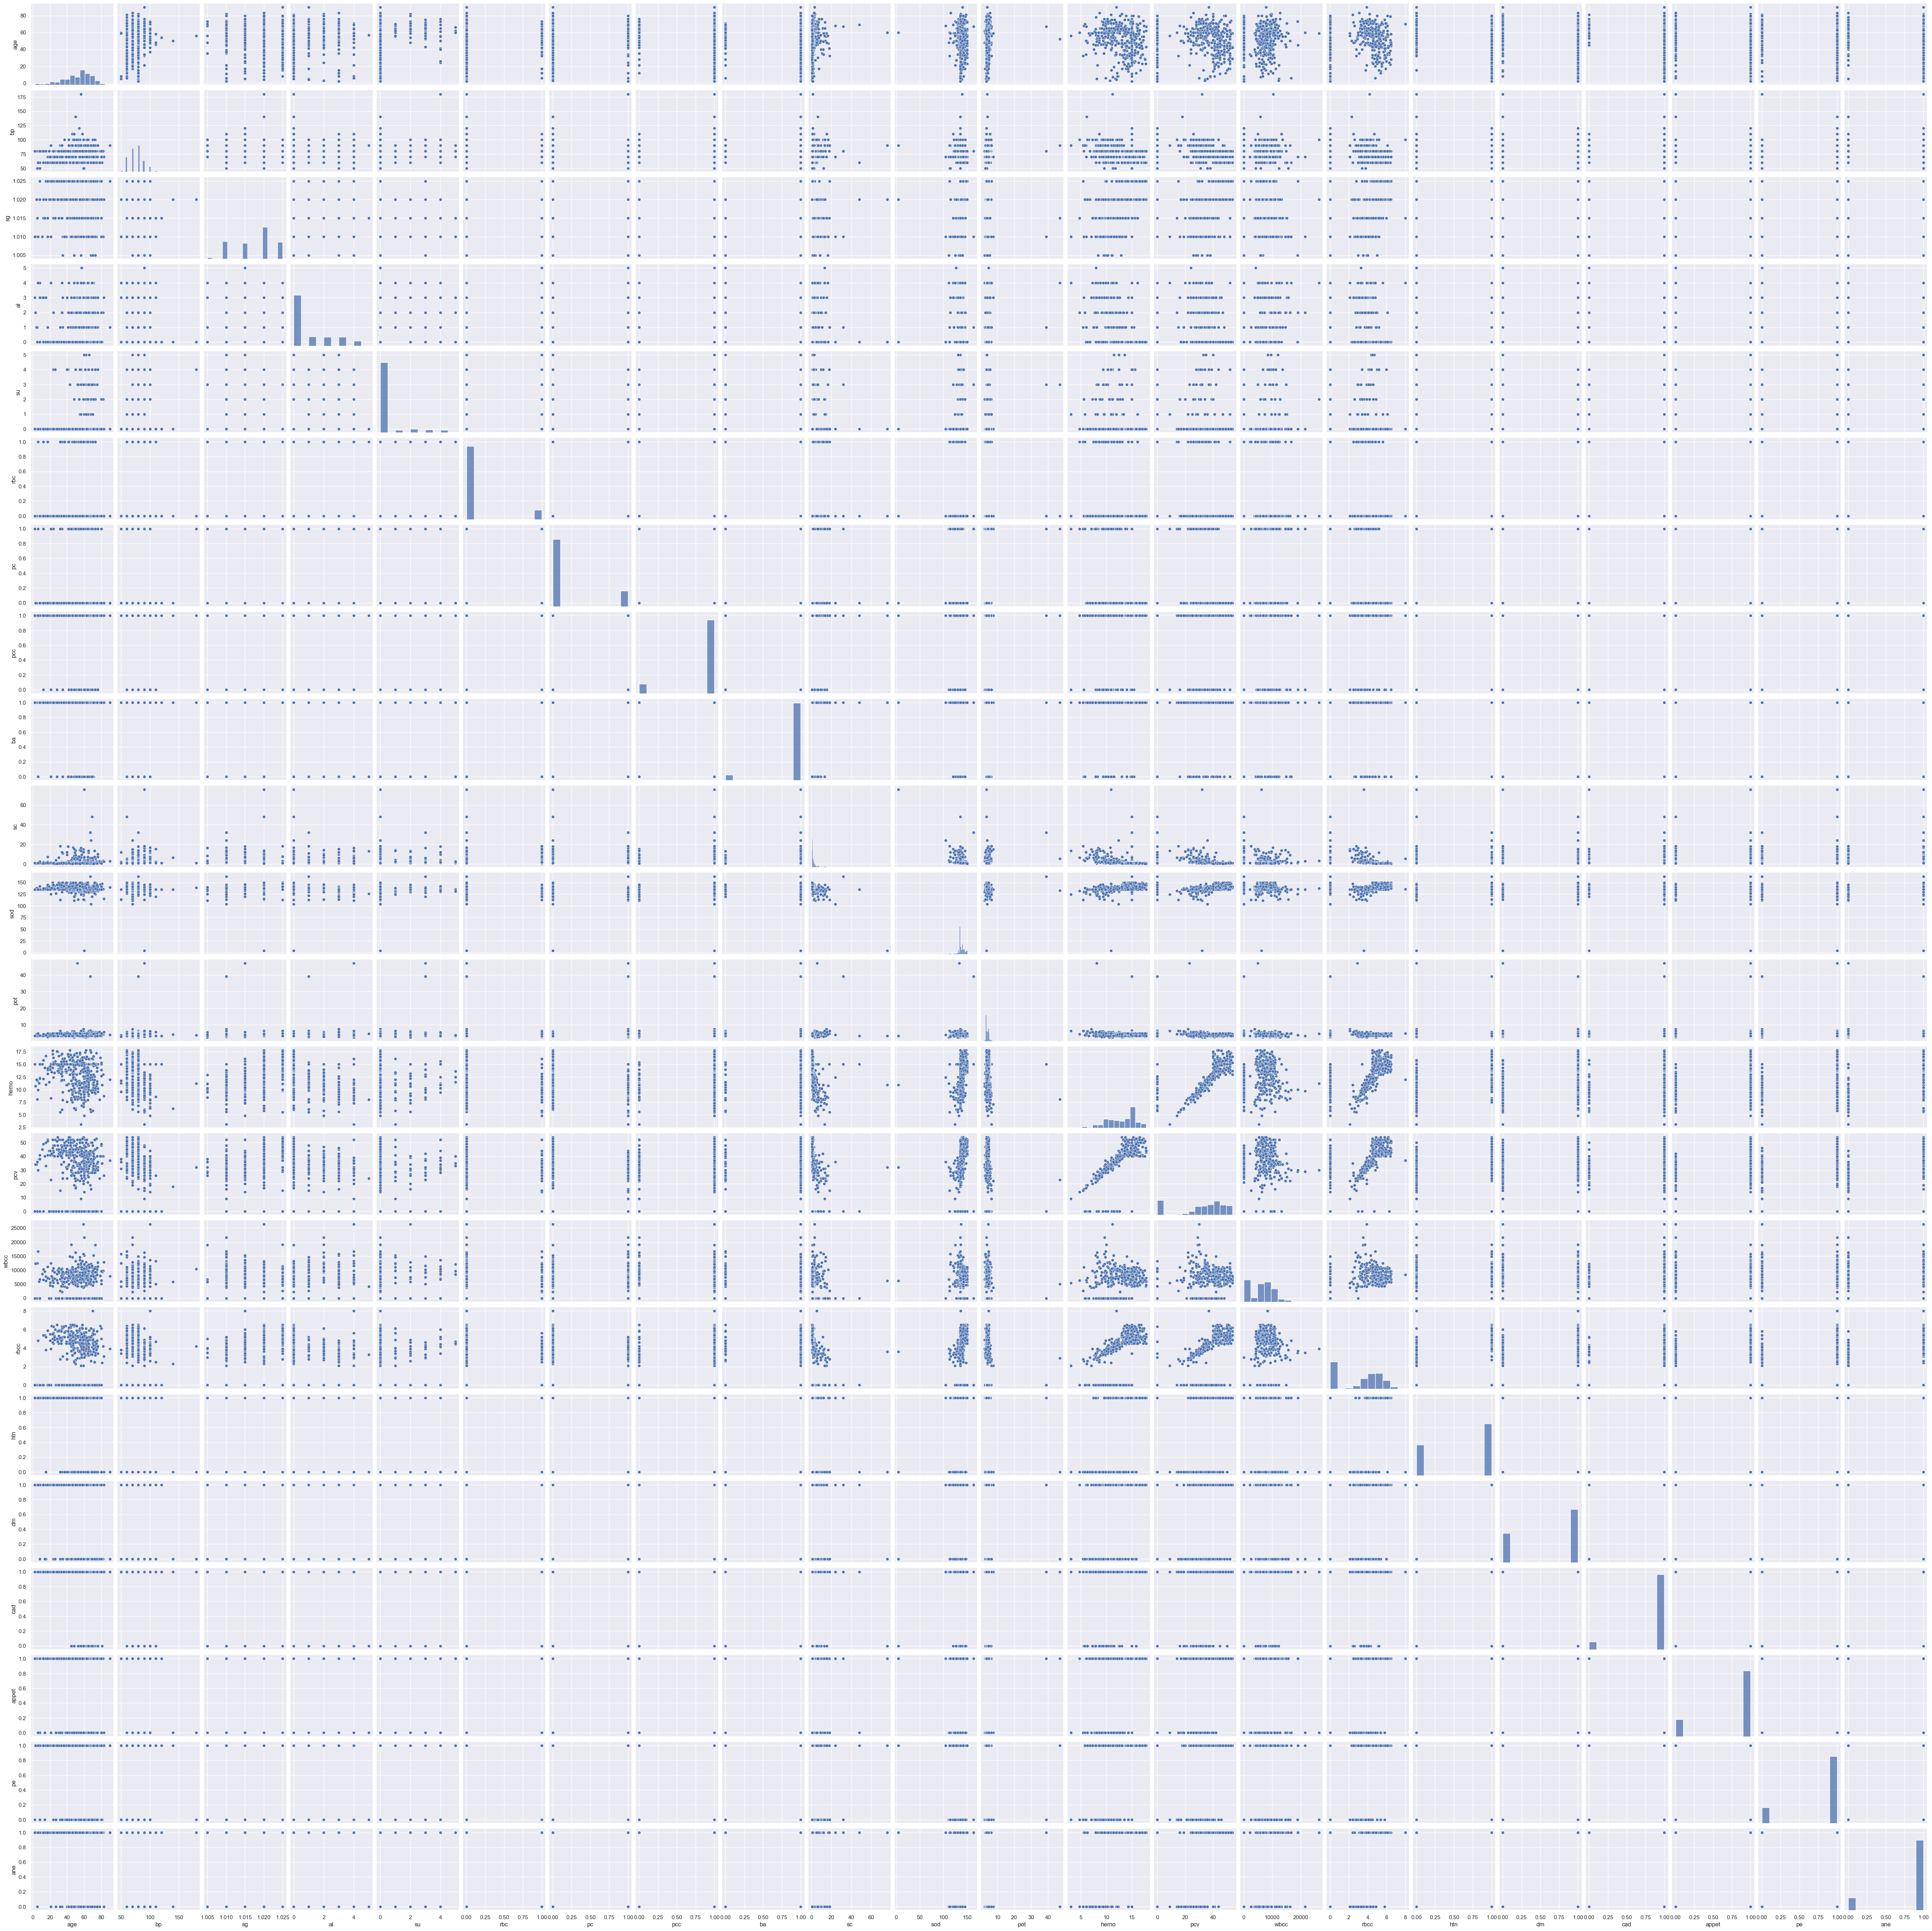

In [18]:
sns.pairplot(df_imputed)

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


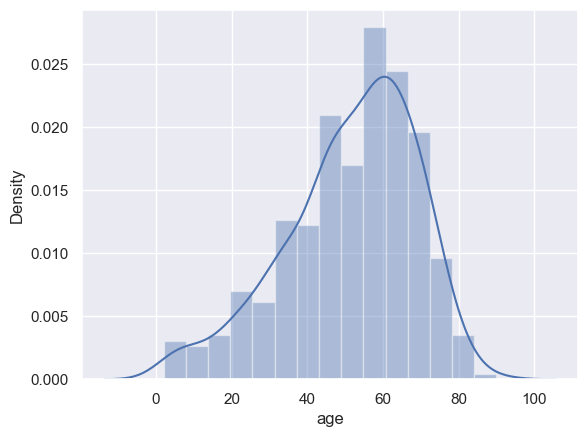

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


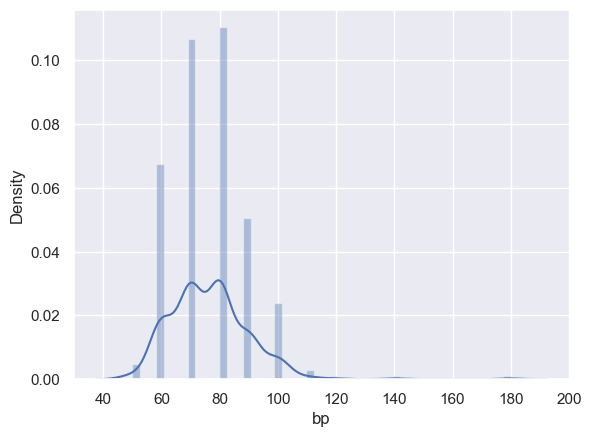

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


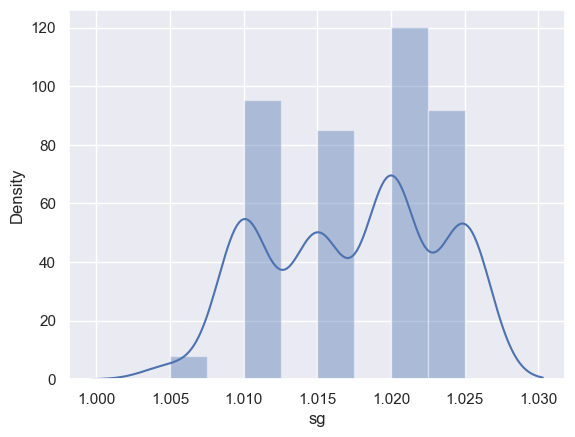

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


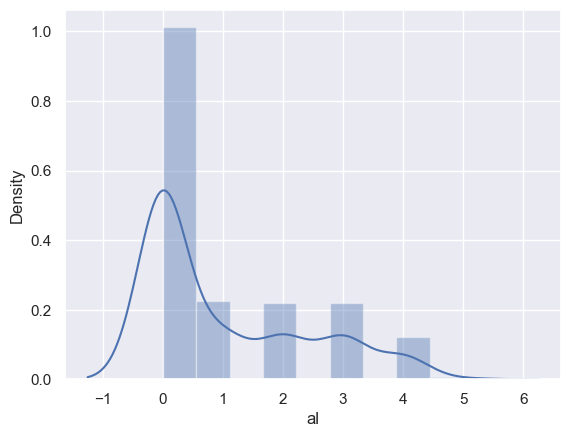

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


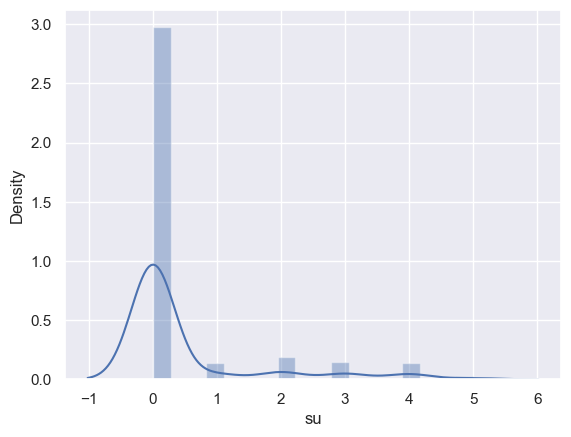

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


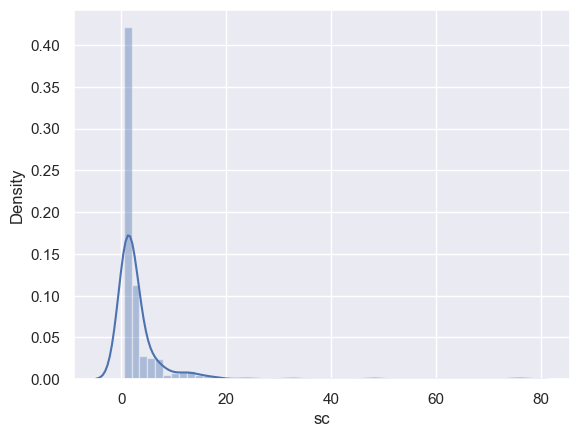

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


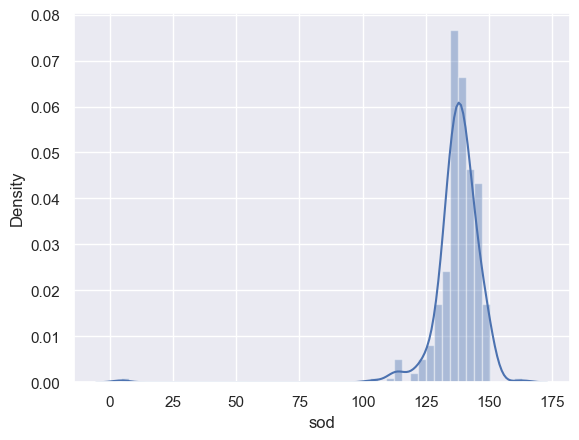

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


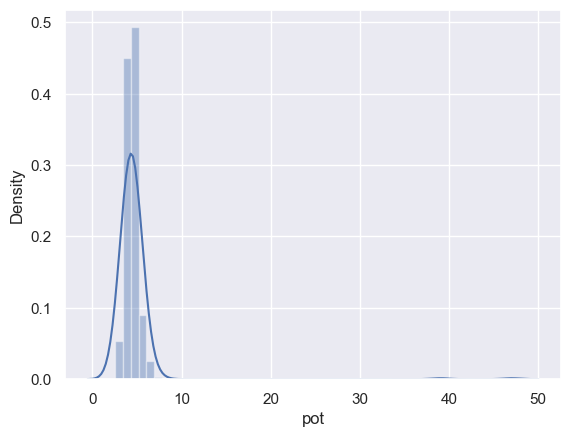

C:\Users\mizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


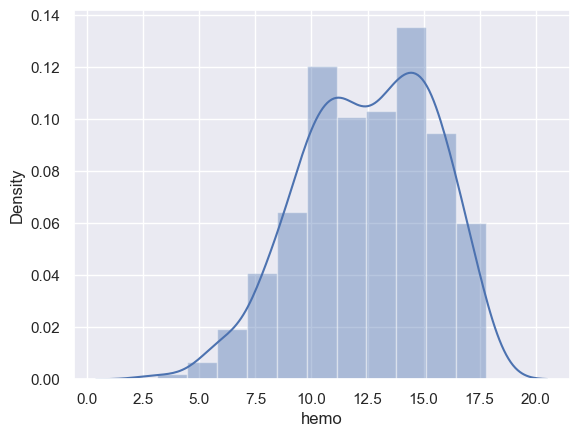

In [20]:
#find the distrubuted of data (cheaked normally distrubuted or not)
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns):
    distplots(i)
    

In [23]:
#labal encoding to convert categorical values to numerical

from sklearn import preprocessing

df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
df_enco.to_csv(r"E:\3.2\software project\kidney_Disease_Pre_processed.csv")

<AxesSubplot:>

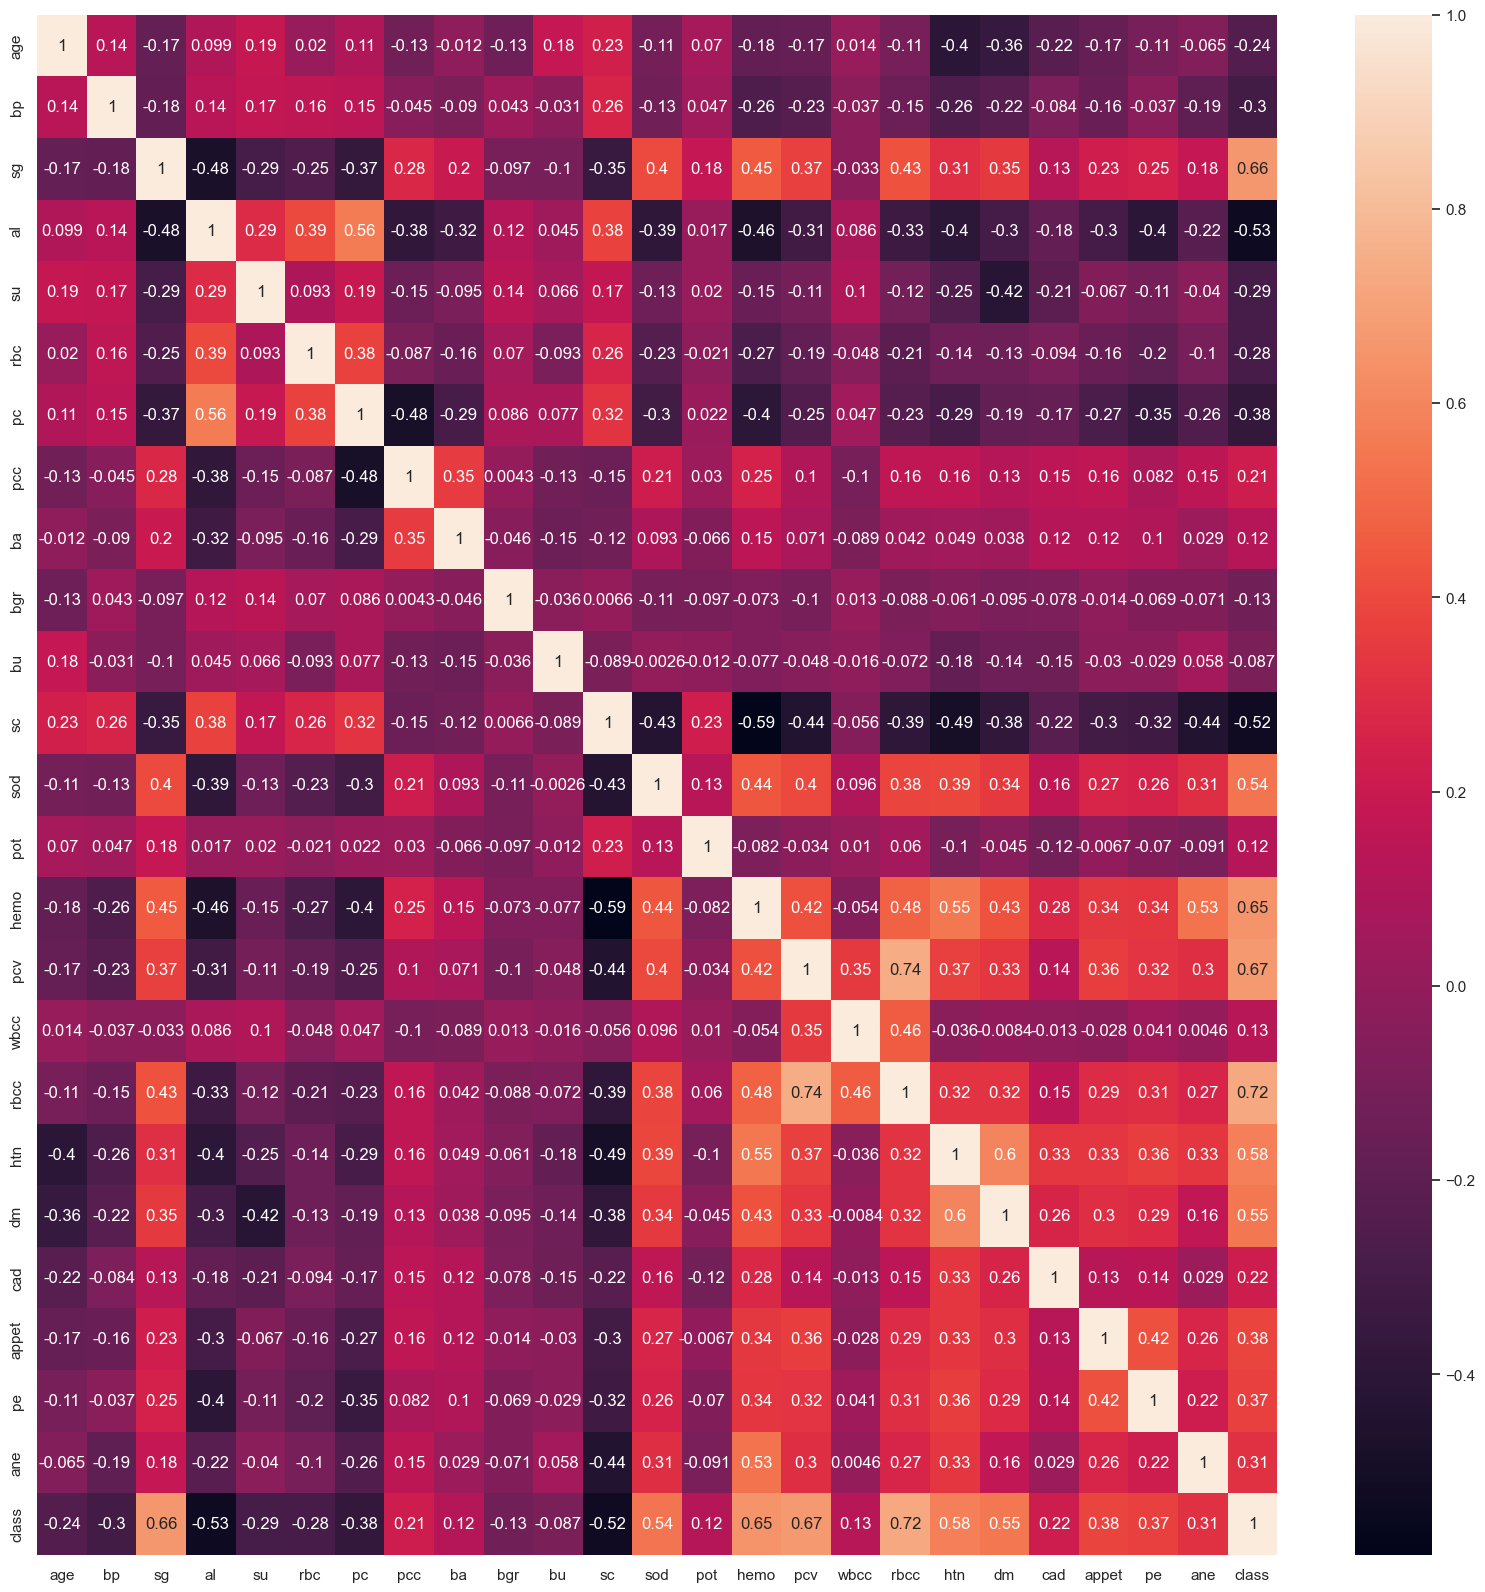

In [25]:
#finding correlation(high correlation )

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)